# 初始化环境

In [73]:
from IPython.display import display, Math, Latex 
from sympy import *
init_printing()

from helper import comparator_factory, comparator_eval_factory, comparator_method_factory

x,y,z = symbols('x y z')

func_comparator = comparator_factory('使用{}前:','使用后:')
method_comparator = comparator_method_factory('调用{}前:','调用后:')
eval_comparator = comparator_eval_factory('计算前:','计算后:')

# 矩阵

## 创建矩阵
### 从list创建矩阵
如果要在Sympy中创建一个矩阵， 可以通过行向量(内嵌的list)构成的list初始化一个```Matrix```类。

In [74]:
m = Matrix(
    [
        [1, -1], 
        [3, 4], 
        [0, 2]
    ]
)

m

⎡1  -1⎤
⎢     ⎥
⎢3  4 ⎥
⎢     ⎥
⎣0  2 ⎦

如果只传入单层的list，那么会创建一个$n \times 1$矩阵。

In [75]:
m = Matrix([1,2,3])

m

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

## 构造常用的矩阵

有一些创建常用矩阵的方法。

### 单位矩阵
用```eye(n)```创建单位矩阵。

In [76]:
M = eye(3)

M

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

### 零矩阵

通过```zero(n)```去创建零矩阵。

In [77]:
M = zeros(3,4)

display(M)

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

### Matrix of Ones
通过```ones(n)```去创建数值全为1的矩阵。

In [78]:
M = ones(3,2)

M

⎡1  1⎤
⎢    ⎥
⎢1  1⎥
⎢    ⎥
⎣1  1⎦

### 对角矩阵
传入数个矩阵或者数值去构造对角矩阵。 数值会被处理成$1 \times 1$矩阵。

In [79]:
M = diag(-1, ones(2, 2), Matrix([5, 7, 5]))

M

⎡-1  0  0  0⎤
⎢           ⎥
⎢0   1  1  0⎥
⎢           ⎥
⎢0   1  1  0⎥
⎢           ⎥
⎢0   0  0  5⎥
⎢           ⎥
⎢0   0  0  7⎥
⎢           ⎥
⎣0   0  0  5⎦

## 基本操作

### 获得形状

用```shape```获得矩阵的形状。

In [80]:
M.shape

### 获取行或者列
使用```row()```和```col()```获取单行或者单列。

In [81]:
M.row(0)

[-1  0  0  0]

获取单列。

In [82]:
M.col(-1)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢5⎥
⎢ ⎥
⎢7⎥
⎢ ⎥
⎣5⎦

### 删除行列
用```row_del```或```col_del```删除行或列。 这些操作会直接修改矩阵。

例如，我们要删除第一行和最后一列。

In [83]:
M = Matrix([[1, 2, 3], [3, 2, 1]])

display('删除前:',M)

M.row_del(0)
M.col_del(-1)

display('删除后:',M)

'删除前:'

⎡1  2  3⎤
⎢       ⎥
⎣3  2  1⎦

'删除后:'

[3  2]

### 矩阵转置
使用```T```

In [84]:
M = Matrix([[1, 2, 3], [4, 5, 6]])

display('原矩阵:',M)
display('转职后矩阵:',M.T)

'原矩阵:'

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

'转职后矩阵:'

⎡1  4⎤
⎢    ⎥
⎢2  5⎥
⎢    ⎥
⎣3  6⎦

### 插入行列

如果要插入行或者列，用```row_insert```或```col_insert```。 这些操作并不会直接修改原矩阵而是返回数值被修改的一个新矩阵。

```row_insert()```接受位置和$1 \times n$矩阵。

In [85]:
M = Matrix([[1, 2, 3], [3, 2, 1]])

method_comparator(M, 'row_insert', 0, Matrix([[6,6,6]]))

调用row_insert()前:


⎡1  2  3⎤
⎢       ⎥
⎣3  2  1⎦

调用后:


⎡6  6  6⎤
⎢       ⎥
⎢1  2  3⎥
⎢       ⎥
⎣3  2  1⎦

```col_insert()```接受位置和$n \times 1$矩阵。

In [86]:
M = Matrix([[1, 2, 3], [3, 2, 1]])

method_comparator(M, 'col_insert', -1,  Matrix([6,6]))

调用col_insert()前:


⎡1  2  3⎤
⎢       ⎥
⎣3  2  1⎦

调用后:


⎡1  2  6  3⎤
⎢          ⎥
⎣3  2  6  1⎦

## 矩阵计算
基本的矩阵计算像加法，减法，乘法，求逆可以通过pythhon的算符```+```,```-```,```*```,```**```来实现。

### 加法

In [87]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])

print('M')
display(M)
print('N')
display(N)
print('M+N')
display(M+N)

M


⎡1   3⎤
⎢     ⎥
⎣-2  3⎦

N


⎡0  3⎤
⎢    ⎥
⎣0  7⎦

M+N


⎡1   6 ⎤
⎢      ⎥
⎣-2  10⎦

### 减法

In [88]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])

print('M')
display(M)
print('N')
display(N)
print('M-N')
display(M-N)

M


⎡1   3⎤
⎢     ⎥
⎣-2  3⎦

N


⎡0  3⎤
⎢    ⎥
⎣0  7⎦

M-N


⎡1   0 ⎤
⎢      ⎥
⎣-2  -4⎦

### 乘法

In [89]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])

print('M')
display(M)
print('N')
display(N)
display('MxN')
display(M*N)

M


⎡1  2  3⎤
⎢       ⎥
⎣3  2  1⎦

N


⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦

'MxN'

⎡5⎤
⎢ ⎥
⎣3⎦

### 求逆

In [90]:
M = Matrix([[1, 3], [-2, 3]])

print('M')
display(M)
print('inverse of M:')
display(M**(-1))

M


⎡1   3⎤
⎢     ⎥
⎣-2  3⎦

inverse of M:


⎡1/3  -1/3⎤
⎢         ⎥
⎣2/9  1/9 ⎦

## 行列式
用```det```计算矩阵的行列式

In [91]:
M = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])

method_comparator(M,'det')

调用det()前:


⎡1  0   1⎤
⎢        ⎥
⎢2  -1  3⎥
⎢        ⎥
⎣4  3   2⎦

调用后:


### 行阶梯型矩阵
用```rref()```将矩阵处理成行阶梯型矩阵。 它返回两个结果，第一个是行阶梯型矩阵， 第二个是主元列的index。

In [92]:
M = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])

M_rref, pivot_columns = M.rref()

print('原矩阵:')
display(M)

print('阶梯型:')
display(M_rref)

print('主元index:')
display(pivot_columns)

原矩阵:


⎡1   0   1   3 ⎤
⎢              ⎥
⎢2   3   4   7 ⎥
⎢              ⎥
⎣-1  -3  -3  -4⎦

阶梯型:


⎡1  0   1    3 ⎤
⎢              ⎥
⎢0  1  2/3  1/3⎥
⎢              ⎥
⎣0  0   0    0 ⎦

主元index:


### 零空间

```nullspace()```返回一个能够张成矩阵零空间的向量组成的list。

In [93]:
M = Matrix([[1, 2, 3, 0, 0], [4, 10, 0, 0, 1]])

print('原矩阵M:')
display(M)
print('矩阵M的零空间的张成向量:')
display(M.nullspace())

原矩阵M:


⎡1  2   3  0  0⎤
⎢              ⎥
⎣4  10  0  0  1⎦

矩阵M的零空间的张成向量:


⎡⎡-15⎤, ⎡0⎤, ⎡ 1  ⎤⎤
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 6 ⎥  ⎢0⎥  ⎢-1/2⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 1 ⎥  ⎢0⎥  ⎢ 0  ⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 0 ⎥  ⎢1⎥  ⎢ 0  ⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎣⎣ 0 ⎦  ⎣0⎦  ⎣ 1  ⎦⎦

### 列空间

```columnspace()```返回一个能够张成矩阵列空间的向量组成的list。

In [94]:
M = Matrix([[1, 1, 2], [2 ,1 , 3], [3 , 1, 4]])

print('矩阵M:')
display(M)
print('张成矩阵M的列空间的向量:')
display(M.columnspace())

矩阵M:


⎡1  1  2⎤
⎢       ⎥
⎢2  1  3⎥
⎢       ⎥
⎣3  1  4⎦

张成矩阵M的列空间的向量:


⎡⎡1⎤, ⎡1⎤⎤
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢2⎥  ⎢1⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎣⎣3⎦  ⎣1⎦⎦

### 特征值和特征向量
要计算矩阵的特征值，可以使用```eigenvals```。它返回由特征值:代数重数对组成的dict。

In [95]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])

print('矩阵M')
display(M)

print('矩阵M的特征值和它们的代数重数:')
display(M.eigenvals())

矩阵M


⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

矩阵M的特征值和它们的代数重数:


```eigenvectors```返回由特征值，几何重数，特征向量列表组成的tuple。

In [96]:
M = Matrix(
    [
        [3, -2,  4, -2], 
        [5,  3, -3, -2], 
        [5, -2,  2, -2], 
        [5, -2, -3,  3]
    ]
)

print('矩阵M')
display(M)

print('特征值，几何重数，特征向量:')
display(M.eigenvects())

矩阵M


⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

特征值，几何重数，特征向量:


⎡⎛-2, 1, ⎡⎡0⎤⎤⎞, ⎛3, 1, ⎡⎡1⎤⎤⎞, ⎛5, 2, ⎡⎡1⎤, ⎡0 ⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢-1⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢0 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠⎦

如果只是想获得特征多项式， 用```charpoly()```和```factor()```

In [97]:
print('矩阵M')
display(M)

lamda = symbols('lamda')
p = M.charpoly(lamda).factor()

print('矩阵M的特征多项式')
display(p)

矩阵M


⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

矩阵M的特征多项式


## 对角化

如果要对角化一个矩阵，用```diagonalize()```。 它返回($P$,$D$)组成的tuple，其中$D$是对角矩阵并且满足$M = PDP^{-1}$。

In [98]:
M = Matrix(
    [
        [3, -2,  4, -2], 
        [5,  3, -3, -2], 
        [5, -2,  2, -2], 
        [5, -2, -3,  3]
    ]
)

P, D = M.diagonalize()

print('矩阵M')
display(M)

print('矩阵P')
display(P)

print('矩阵D')
display(D)

display(Latex('$PDP^{-1}$'))
display(P*D*P**-1)

矩阵M


⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

矩阵P


⎡0  1  1  0 ⎤
⎢           ⎥
⎢1  1  1  -1⎥
⎢           ⎥
⎢1  1  1  0 ⎥
⎢           ⎥
⎣1  1  0  1 ⎦

矩阵D


⎡-2  0  0  0⎤
⎢           ⎥
⎢0   3  0  0⎥
⎢           ⎥
⎢0   0  5  0⎥
⎢           ⎥
⎣0   0  0  5⎦

<IPython.core.display.Latex object>

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

# 等式求解

## 基本求解
代数等式求解的主要函数是```solveset()```。 它的语法是```solveset(equation, variable=None, domain=S.Complexes)```

In [99]:
eq = Eq(x**2-1, 0)

func_comparator(eq, solveset, x)

使用solveset()前:


使用后:


如果```solveset()```中传入一个表达式而非等式， 那么它会被假设等于0,。

In [100]:
expr = x**2-1

func_comparator(expr, solveset, x)

使用solveset()前:


使用后:


求解结果可以是无限集合。

In [101]:
eq = Eq(sin(x) - 1)

func_comparator(eq, solveset, x)

使用solveset()前:


使用后:


求解结果可以是空集。

In [102]:
eq = Eq(exp(x))

func_comparator(eq, solveset, x)

使用solveset()前:


使用后:


如果求解失败，会返回一个条件集合。

In [103]:
eq = Eq(cos(x) - x)

func_comparator(eq, solveset, x)

使用solveset()前:


使用后:


```solveset()```只会显示每个解一次。

In [104]:
eq = Eq(x**3 - 6*x**2 + 9*x,0)

func_comparator(eq, solveset, x)

使用solveset()前:


使用后:


如果要获得多项等式每个解的重数，可以用```roots()```

In [105]:
eq = Eq(x**3 - 6*x**2 + 9*x,0)

func_comparator(eq, roots, x)

使用roots()前:


使用后:


## 线性系统

```linsolve()```用于求解线性系统. 线性系统有不同的定义方法。

### 等式list

In [106]:
ls = [
    Eq(x + y + z - 1), 
    Eq(x + y + 2*z - 3)
]

func_comparator(ls,linsolve, x, z)

使用linsolve()前:


使用后:


等式list可以简化成表达式list， 如果这些表达式都等于0。

In [107]:
ls = [
    x + y + z - 1, 
    x + y + 2*z - 3
]

func_comparator(ls,linsolve, x, z)

使用linsolve()前:


使用后:


### 增广矩阵形式

In [108]:
M = Matrix(
    [
        [1, 1, 1, 1], 
        [1, 1, 2, 3]
    ]
)
    
func_comparator(M,linsolve, x, y, z)

使用linsolve()前:


⎡1  1  1  1⎤
⎢          ⎥
⎣1  1  2  3⎦

使用后:


### $Ax = b$ 形式

In [109]:
M = Matrix(
    [
        [1, 1, 1, 1], 
        [1, 1, 2, 3]
    ]
)
ls = A, b = M[:, :-1], M[:, -1]

func_comparator(ls,linsolve, x, y, z)

使用linsolve()前:


⎛⎡1  1  1⎤, ⎡1⎤⎞
⎜⎢       ⎥  ⎢ ⎥⎟
⎝⎣1  1  2⎦  ⎣3⎦⎠

使用后:


## 非线性系统

```solvset()```不能解非线性多元系统。 遇到这样的需求用```solve()```代替。

In [110]:
eq_list = [
    Eq(x*y - 1, 0),
    Eq(x-2, 0)
]

func_comparator(eq_list, solve, x, y)

使用solve()前:


使用后:


## 微分方程
先定义函数符号变量。

In [111]:
f = symbols('f', cls = Function)

然后定义微分方程，例如，$f''(x) - 2f'(x) + f(x) = \sin(x)$

In [112]:
diffeq = Eq(f(x).diff(x, 2) - 2*f(x).diff(x) + f(x), sin(x))

然后用```dsolve()```求解。

使用dsolve()前:


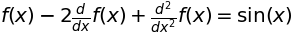

使用后:


In [113]:
func_comparator(diffeq, dsolve, f(x))

如果无法得到显式的解， ```dsolve()```返回一个隐函数形式。

使用dsolve()前:


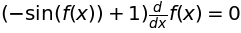

使用后:


In [114]:
diffeq = Eq(f(x).diff(x)*(1 - sin(f(x))), 0)

func_comparator(diffeq, dsolve, f(x))

# 参考资料
[Sympy Documentation](http://docs.sympy.org/latest/index.html)

# 相关文章
* [Sympy笔记I]({filename}0026_sympy_intro_1_ch.ipynb)
* [Sympy笔记II]({filename}0027_sympy_intro_2_ch.ipynb)
* [Sympy笔记III]({filename}0028_sympy_intro_3_ch.ipynb)
* [Sympy笔记IV]({filename}0029_sympy_intro_4_ch.ipynb)